In [10]:
import os
os.chdir('../')

In [13]:
import plotly
import numpy as np
import pickle

In [11]:
waves = np.load('debug\\waves.npy')

In [17]:
with open('debug\\waves_inds.pck', 'rb') as f:
    waves_inds = pickle.load(f)

In [273]:
indices_sorted = list(reversed(sorted(waves_inds.copy(), key=len)))

In [283]:
indices_filtered_volume = list(filter(lambda x: len(x) > 200, indices_sorted))

In [284]:
len(indices_filtered_volume)

133

In [319]:
len(indices_filtered_volume[2])

56566

In [366]:
data_relative = np.ndarray(shape=(0, 5))
data_absolute = np.ndarray(shape=(0, 5), dtype='int32')

indices_sorted = list(reversed(sorted(waves_inds.copy(), key=len)))
indices_filtered_volume = list(filter(lambda x: len(x) > 200, indices_sorted))

data_dims = np.zeros(shape=(len(indices_filtered_volume), 7), dtype='int32')


for i, indices in enumerate(indices_filtered_volume):
    max_x = max(indices, key=lambda x: x[0])[0]
    min_x = min(indices, key=lambda x: x[0])[0]
    max_y = max(indices, key=lambda x: x[1])[1]
    min_y = min(indices, key=lambda x: x[1])[1]
    max_z = max(indices, key=lambda x: x[2])[2]
    min_z = min(indices, key=lambda x: x[2])[2]
    
    min_ind, max_ind = np.array((min_x, min_y, min_z)), np.array((max_x, max_y, max_z))
    roi_shape = max_ind - min_ind + [1,1,1]
    
    indices_shift = indices.copy()
    indices_shift = indices_shift - min_ind
    
    roi = np.zeros(shape=roi_shape, dtype='uint8')
    
    color = np.ones((indices_shift.shape[0], 1), dtype='uint8')
    
    dim_row = [i, min_x, max_x, min_y, max_y, min_z, max_z]
    data_dims[i,0] = i
    data_dims[i,1] = min_x
    data_dims[i,2] = max_x
    data_dims[i,3] = min_y
    data_dims[i,4] = max_y
    data_dims[i,5] = min_z
    data_dims[i,6] = max_z
    
    for index, ref_index in zip(indices_shift, indices):
        x, y, z = index
        x_ref, y_ref, z_ref = ref_index
        roi[x, y, z] = timespace[x_ref, y_ref, z_ref]

    for i, index in enumerate(indices_shift):
        x, y, z = index
        color[i] = roi[x, y, z]
    
    id = i * np.ones((indices_shift.shape[0], 1), dtype='uint8')
    
    data_r = np.concatenate([id, indices_shift, color], axis=1)
    data_a = np.concatenate([id, indices, color], axis=1)
    data_relative = np.concatenate([data_relative, data_r], axis=0)
    data_relative = data_relative.astype('uint8')
    data_absolute = np.concatenate([data_absolute, data_a], axis=0)
    data_absolute = data_absolute.astype('int32')

abs_cols = ['id', 'x', 'y', 'z', 'color']
dims_cols = ['id', 'x_min', 'x_max', 'y_min', 'y_max', 'z_min', 'z_max']

rel = pd.DataFrame(columns=abs_cols, data=data_relative)
abs = pd.DataFrame(columns=abs_cols, data=data_absolute)
dims = pd.DataFrame(columns=dims_cols, data=data_dims)
    
return (abs, rel, dims)


In [371]:
abs_cols = ['id', 'x', 'y', 'z', 'color']
dims_cols = ['id', 'x_min', 'x_max', 'y_min', 'y_max', 'z_min', 'z_max']

rel = pd.DataFrame(columns=abs_cols, data=data_relative)
abs = pd.DataFrame(columns=abs_cols, data=data_absolute)
dims = pd.DataFrame(columns=dims_cols, data=data_dims)

In [374]:
import sys 

!{sys.executable} -m pip install tables 

  Using cached tables-3.6.1-2-cp36-cp36m-win_amd64.whl (3.2 MB)
  Using cached numexpr-2.7.1-cp36-none-win_amd64.whl (90 kB)


In [375]:
rel.to_hdf('debug\\segmentation_relative.h5', key='df')
abs.to_hdf('debug\\segmentation_absolute.h5', key='df')
dims.to_hdf('debug\\segmentation_dims.h5', key='df')

In [369]:
rel.head()

,id,x,y,z,color
0,8,0,57,13,65
1,8,0,58,13,42
2,8,1,57,13,80
3,8,0,59,13,31
4,8,1,58,13,29


In [ ]:
data_dims

In [347]:
data_dims[:10]

array([[  0, 169,  15,  82, 198, 180, 209],
       [  1, 245,  72,  15, 118, 156, 177],
       [  2, 191,  17, 122, 222,  42,  63],
       [  3, 208,  22, 144,  11, 105, 127],
       [  4,   8, 114, 109, 171, 110, 157],
       [  5, 213,  34,  12,  82, 235, 251],
       [  6, 199,  27,  66, 135,  59,  79],
       [  7, 213,  33,   2,  85,  85, 102],
       [  8,   3, 129,  24, 175, 156, 175],
       [  9,   5,  87, 201,  10, 141, 161]], dtype=uint8)

In [339]:
np.save('debug\\segmentations.npy', data_all)

In [340]:
data_all[2,:]

array([  0, 169, 169, 180, 209, 198, 209,   1,  57,  13,  80], dtype=uint8)

In [334]:
data_all.shape

(941580, 11)

In [335]:
data_all

array([[  0,   0,   0, ...,  57,  13,  65],
       [169, 169, 169, ...,  58,  13,  42],
       [169, 169, 169, ...,  57,  13,  80],
       ...,
       [  1,   1,   1, ...,   4,   1,   7],
       [  1,   1,   1, ...,   3,   1,   6],
       [  1,   1,   1, ...,   4,   1,   1]], dtype=uint8)

In [327]:
data_all[:10]

array([[169, 169, 169, 169, 169, 169,   0,  57,  13,  65],
       [169, 169, 169, 169, 169, 169,   0,  58,  13,  42],
       [180, 180, 180, 180, 180, 180,   1,  57,  13,  80],
       [209, 209, 209, 209, 209, 209,   0,  59,  13,  31],
       [198, 198, 198, 198, 198, 198,   1,  58,  13,  29],
       [209, 209, 209, 209, 209, 209,   1,  57,  14,  53],
       [  1,   1,   1,   1,   1,   1,   1,  57,  12,  53],
       [  1,   1,   1,   1,   1,   1,   2,  57,  13,  70],
       [  1,   1,   1,   1,   1,   1,   0,  60,  13,  33],
       [  1,   1,   1,   1,   1,   1,   1,  59,  13,  25]], dtype=uint8)

In [286]:
i = 100

In [287]:
indices = indices_sorted[i].copy()

In [288]:
max_x = max(indices, key=lambda x: x[0])[0]
min_x = min(indices, key=lambda x: x[0])[0]
max_y = max(indices, key=lambda x: x[1])[1]
min_y = min(indices, key=lambda x: x[1])[1]
max_z = max(indices, key=lambda x: x[2])[2]
min_z = min(indices, key=lambda x: x[2])[2]

In [289]:
min_ind, max_ind = np.array((min_x, min_y, min_z)), np.array((max_x, max_y, max_z))
roi_shape = max_ind - min_ind + [1,1,1]

In [290]:
indices_shift = indices.copy()
indices_shift = indices_shift - min_ind

In [291]:
roi = np.zeros(shape=roi_shape, dtype='uint8')

In [292]:
timespace = np.load("debug\\waves.npy")

In [293]:
color = np.ones((indices_shift.shape[0], 1))

In [304]:
cords = np.ones((indices_shift.shape[0], 6))
cords[0,:] = min_x
cords[1,:] = min_x
cords[2,:] = min_z
cords[3,:] = max_z
cords[4,:] = max_y
cords[5,:] = max_z

In [294]:
for index, ref_index in zip(indices_shift, indices):
    x, y, z = index
    x_ref, y_ref, z_ref = ref_index
    roi[x, y, z] = timespace[x_ref, y_ref, z_ref]

for i, index in enumerate(indices_shift):
    x, y, z = index
    color[i] = roi[x, y, z]

In [310]:
data = np.concatenate([cords, indices_shift, color], axis=1)

In [296]:
import pandas as pd

In [297]:
df = pd.DataFrame(data=data, columns =['x', 'y', 'z', 'color'])

In [301]:
df.max()['x']

12.0

In [302]:
nticks_x, nticks_y, nticks_z = df.max()['x'], df.max()['y'], df.max()['z']

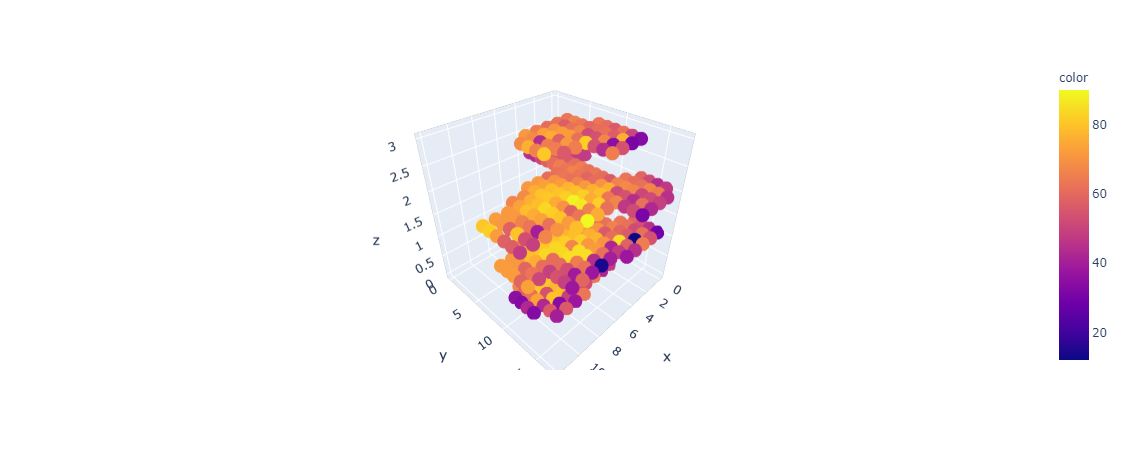

In [298]:
import plotly.express as px
fig = px.scatter_3d(df, x='x', y='y', z='z',
              color='color')
fig.show()

In [173]:
roi.shape

(72, 125, 24)

In [177]:
max(indices_shift)

[70, 35, 12]

In [178]:
min(indices_shift)

[0, 18, 6]

In [185]:
len(indices_shift)

55970

In [179]:
for index in indices_shift:
    x, y, z = index[0], index[1], index[2]
    roi[x, y, z] = 255

In [180]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(roi)
fig.show()

ValueError: Must pass 2-d input

In [29]:
min_x

(0, 951, 313)

In [ ]:
for indices in waves_ind_list:
    max_x = max(indices, key=lambda x: x[0])
    min_x = min(indices, key=lambda x: x[0])
    max_y = max(indices, key=lambda x: x[1])
    min_y = min(indices, key=lambda x: x[1])
    max_z = max(indices, key=lambda x: x[2])
    min_z = min(indices, key=lambda x: x[2])

    dim_x = max_x - min_x
    dim_y = max_y - min_y
    dim_z = max_z - min_z

    roi = np.zeros(shape=(dim_x, dim_y, dim_z), type='uint8')

In [ ]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(df, x='sepal_length', y='sepal_width', z='petal_width',
              color='species')
fig.show()